In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = tf.keras.datasets.fashion_mnist
(x_train, train_labels), (x_test, test_labels) = df.load_data()

The first dimension, 60000, represents the number of samples in the training dataset. In this case, there are 60,000 images in the training dataset.
The second and third dimensions, both 28, represent the height and width of each image, respectively. In this case, each image in the dataset is a grayscale image with dimensions of 28 pixels by 28 pixels.

In [10]:
print(x_train.shape)
print(x_test.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

The lines x_train = x_train / 255.0 and x_test = x_test / 255.0 are performing a normalization step on the pixel values of the images in the training and testing datasets, respectively.

In the fashion_mnist dataset, each pixel value represents the intensity of the corresponding pixel in the image, with values ranging from 0 to 255 for grayscale images (0 representing black and 255 representing white).

By dividing each pixel value by 255.0, the pixel values are rescaled to the range [0, 1]. This normalization process ensures that all feature values are on a similar scale, which can make training more stable and may help the model converge faster.

So, after this normalization step, the pixel values in both the training and testing datasets will be scaled to the range [0, 1], making them suitable for training machine learning models, particularly neural networks.

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


<function matplotlib.pyplot.show(close=None, block=None)>

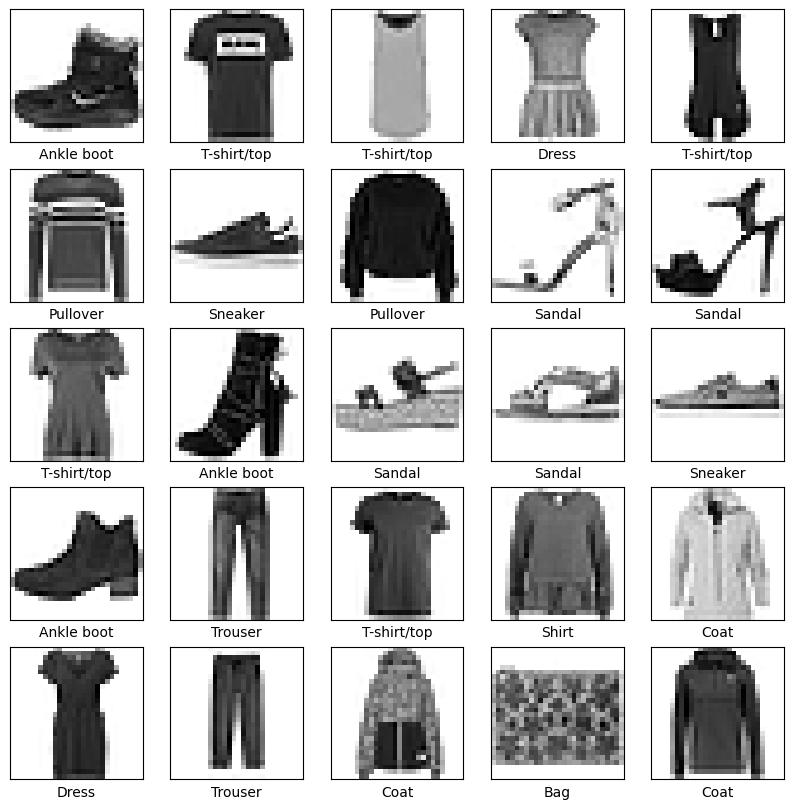

In [25]:
# Verify data is in correct format
# This code snippet is used to verify that the training images and 
# labels are correctly loaded and formatted. 
# It creates a grid of 25 subplots, each displaying an image from the training dataset along with its corresponding label.

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1) #plt.subplot(5, 5, i + 1): This line creates a subplot in a 5x5 grid layout and selects the i-th subplot for plotting. The i + 1 is used because subplot indices start from 1 in Matplotlib.
  plt.xticks([]) #These lines remove the x-axis and y-axis ticks from the plot, making the visualization cleaner.
  plt.yticks([]) #These lines remove the x-axis and y-axis ticks from the plot, making the visualization cleaner.
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [26]:

from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model.summary()

/home/kalp/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train, train_labels, epochs = 10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7796 - loss: 0.6306
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8621 - loss: 0.3818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8767 - loss: 0.3413
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.3093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8953 - loss: 0.2873
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8978 - loss: 0.2771
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.2580
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9051 - loss: 0.2560
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9113 - loss: 0.2413
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9126 - loss: 0.2329


In [28]:
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8802 - loss: 0.3380

 Test accuracy =  0.8802000284194946


In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [30]:
predictions = probability_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
     

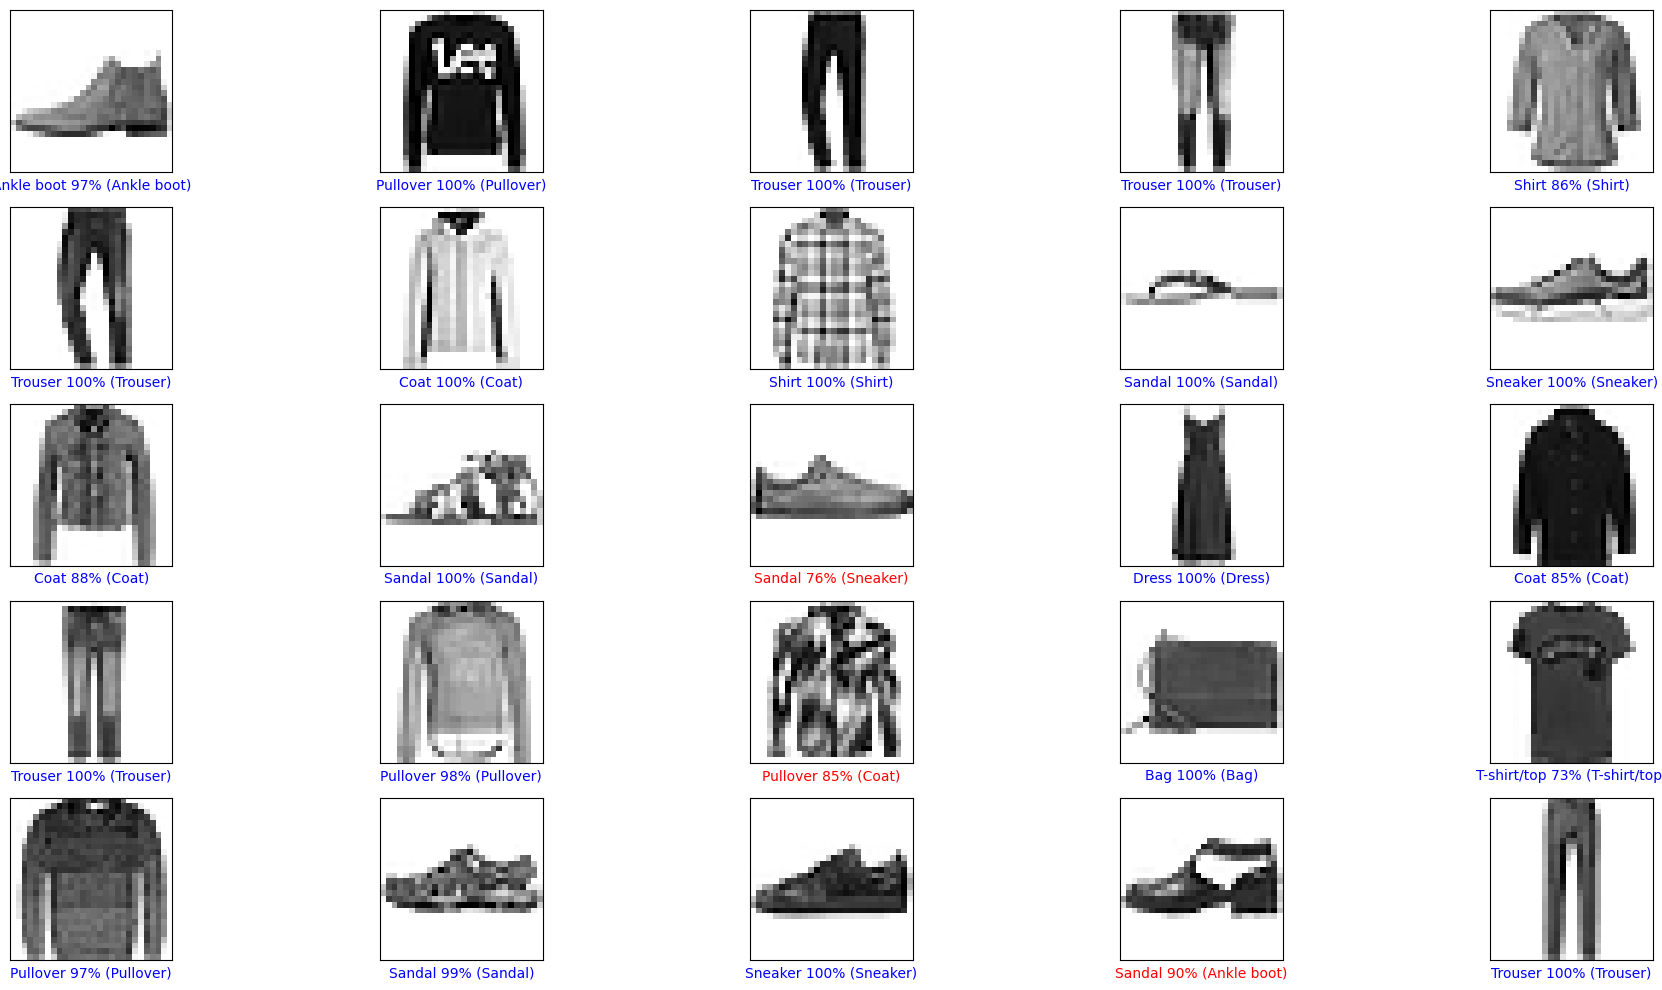

In [32]:

rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, x_test)
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import classification_report
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(x_test, predictions, target_names=class_names)
print(cr)

ValueError: Classification metrics can't handle a mix of unknown and continuous-multioutput targets